In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
from datetime import datetime
import schedule
import time
import os
import re
import subprocess
import pandas as pd
from pathlib import Path


In [ ]:
#save only 1 record per termal_zone
def thermal_zone():
    t_zone = [os.path.join(thermal, m.group(0)) for m in [re.search('thermal_zone[0-9]+', d) for d in os.listdir(thermal)] if m] 
    #t_zone = [filename for filename in os.listdir(thermal) if filename.startswith("thermal_zone")]
    return t_zone

def value(valor):
    val = (subprocess.check_output(['cat', valor]))
    return val

def thermal_temperature(zona):
    zona_temp = ([int(value(os.path.join(p, 'temp'))) for p in zona])

    return zona_temp


def job(zona):
        fp = open(temp_database.txt, 'a')
        zona_t = ([int(value(os.path.join(p, 'temp'))) for p in zona])
        now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")    
        record = ""
        record = str(now).split(" ")[0]+";"+str(now).split(" ")[1]
        i=0
        for p in zona: 
            record +=";"+str(zona_t[i])
            i+=1        
        record +=str('\n')
        fp.write(record)    
        fp.close()
schedule.every(1).minutes.do(job)
        

while True:
    schedule.run_pending()
    time.sleep(1)
    


def save_thermal_temperature(zona, file):
    q = open(file, 'w')
    zona_temp = ([int(value(os.path.join(p, 'temp'))) for p in zona])
    
    now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")   
    label = ""
    label = str("day")+";"+str("time")
    record = ""
    record = str(now).split(" ")[0]+";"+str(now).split(" ")[1]
    i=0
    for p in zona: 
        label += ";"+str(p.split("/")[-1])
        record +=";"+str(zona_temp[i])
        i+=1        
    record +=str('\n')
    q.write(str(label)+"\n")
    q.write(record)    
    q.close()
    
def print_several_temps_all_zones(file):
    df = pd.read_csv(file, sep=";", header=None)
    
    time_list = df[df.columns[1]].values.tolist()[1:]
    zones_dict = {}    
    all_zones_in_a_dictionary(zones_dict, df)
    print(zones_dict)
    zonesdict = zones_dict
    
    df = pd.DataFrame(data=zonesdict)
    df.index = time_list
    lines = df.plot.line(figsize=(15, 6))
    plt.title("Gráfico das Zonas Térmicas")
    plt.xlabel('Horário')
    plt.ylabel('Temperatura em MiliCelsius')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.85))
    
def all_zones_in_a_dictionary(zones_dict, df):

    for i in range(2, df.shape[1]):
        print("accessing position:", i)
        zone_name = df[df.columns[i]].values.tolist()[0]
        temp_list = df[df.columns[i]].values.tolist()[1:]
        temp_list_2 = [float(element) for element in temp_list]

        zones_dict[str(zone_name)] = temp_list_2
    return zones_dict

In [ ]:

thermal = '/sys/class/thermal/'

def main():    
    output_file_unico = "temp_database.csv"
    output_file_varios = "temp_database_all.csv" 
      
    #Especifica a zona termal que se quer medir
    zona = thermal_zone()
    
    #arc = job()
    
  
    #Salva as temperaturas de cada zona (1 unica vez)
    save_thermal_temperature(zona, output_file_unico)
    
    # No futuro esta funcao vai ser chamada por 1 thread isolada    
  
    # Salva as temperaturas de cada zona (1 registro por intervalo=segundo)
    # chamada da funcao aqui
    # exemplo - save_thermal_temperature_por_segundo(zona, output_file_unico,10)
    
#     Printa grafico de linhas que exibe 1 temperatura por zona (arquivo output_file_unico)
#     chamada da funcao aqui
#     ex. print_single_temp(zona, output_file_unico)
#    print_single_temp(zona, output_file_unico)

#     # Printa grafico de linhas que exibe 10 temperaturas para cada zona termal (de 1 em 1)
#     # no intervalo de tempo especificado (usar o arquivo output_file_varios e printar os 10 ultimos minutos)
#     # chamada da funcao aqui
#     # ex. print_several_temps(output_file_unico, interval=10)
    
    #print_several_temps_all_zones(output_file_varios)
    
    
    
if __name__ == "__main__":
    main()

In [3]:
#     # Printa grafico de linhas que exibe 10 temperaturas para cada zona termal (de 1 em 1)
import os
import re
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import json
import schedule
import time

import pandas as pd
from datetime import datetime

df = pd.read_csv('temp_database.csv', sep=";", header=None)
cols = [0,1,2]
df2 = df
#df2
#df2.dtypes
#df

FileNotFoundError: [Errno 2] No such file or directory: 'temp_database.csv'

['14:31:31.166730', '14:31:31.178733', '14:31:31.187117', '14:31:31.196725', '14:31:31.204765', '14:31:31.214550', '14:31:31.222740', '14:31:31.231003', '14:31:31.238888', '14:31:31.247040']
['20000', '20000', '20000', '20000', '20000', '20000', '20000', '20000', '20000', '20000']


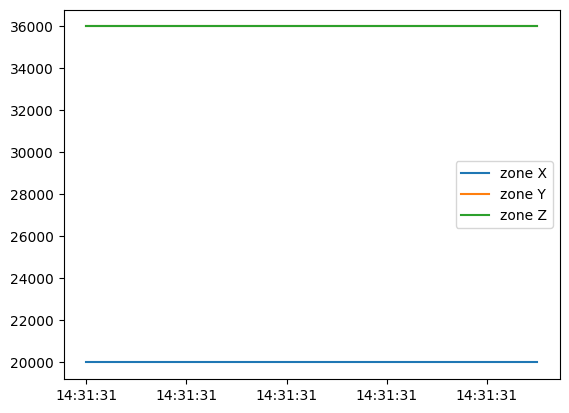

In [53]:


# df = pd.DataFrame({
#    'pig': [20, 18, 489, 675, 1776],
#    'horse': [4, 25, 281, 600, 1900]
#    }, index=[1990, 1997, 2003, 2009, 2014])
# lines = df.plot.line()

time_list = df2[df2.columns[1]].values.tolist()[1:]
temp_list = df2[df2.columns[2]].values.tolist()[1:]
temp_list_col_3 = df2[df2.columns[3]].values.tolist()[1:]
# time_list = time_list[1:]
# temp_list = temp_list[1:]

time_list_2 = [string.split(".")[0] for string in time_list]

temperature_list = [float(element) for element in temp_list]
temperature_list_3 = [float(element) for element in temp_list_col_3]

print(time_list)
print(temp_list)

#print (df_temp_list.dtypes)

#print (df_temp_list[df_temp_list.columns[0]])

df = pd.DataFrame({
    'zone X': temperature_list,
    'zone Y': temperature_list_3,
    'zone Z': temperature_list_3,
   },index= time_list_2)

lines = df.plot.line()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt        
#import matplotlib.ticker as ticker
#import json
#import time

df = pd.read_csv('temp_database.txt', sep=";", header=None)
df.columns = ["day", "time", "thermal_zone2", "thermal_zone0", "thermal_zone7","thermal_zone5", 
               "thermal_zone3", "thermal_zone1", "thermal_zone8","thermal_zone6","thermal_zone4"]

# plt.step(df['time'], df['thermal_zone8'], color = 'red')
# plt.plot(df['time'], df['thermal_zone8'], 'o', color = 'blue', alpha = 0.8)

# plt.title('Temperatura na zona 8')
# plt.xlabel('Horário')
# plt.ylabel('Temperatura em MiliCelsius')
# plt.legend(['Signal','ZOH'])
# plt.show()

     

ValueError: Length mismatch: Expected axis has 9 elements, new values have 11 elements

In [38]:
import csv
import matplotlib.pyplot as plt
import numpy


with open('temp_database.txt', 'r') as csvfile:
    reader = csv.reader(csvfile)
    # convert strings to numbers, collect everything in a list of lists
    data_list = [[str(item) for item in row] for row in reader if row]

# convert to numpy array for convenient indexing
data = numpy.array(data_list)
column_index = 1
plt.plot(data[:, column_index])  
# or plt.plot(data) to show all columns
# or plt.scatter(data[:, 0], data[:, 1]) for a scatter plot
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [9]:
valores = ['zona_0', 'zona_1', 'zona_2', 'zona_3', 'zona_4', 'zona_5', 'zona_6', 'zona_7', 'zona_8']

In [8]:
#def job():
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("now =", dt_string)

with open("temp.txt", "r") as temp:
    #myList = json.load(temp)
    #print(myList[0])
    #print(myList)
    data = temp.readline()
    data = data.split(",")[3].replace("[", "")
    
    data_outro = ""
    
    q = open("tzone3.txt", 'w')
    q.close()
 
    with open("tzone3.txt", 'r') as tzone3:
        data_outro = tzone3.readline().replace("[", "").replace("]", "").replace("\n", "")
        data_outro = data_outro.split(", ")
        
    with open("tzone3.txt", "w") as tzone3:
        data_outro.append(data)
        data_outro = ", ".join(data_outro)
        data_outro = "[" + data_outro + "]"
        
        tzone3.write(data_outro)
        print(data_outro)
        
    data = temp.readline()
    data = data.split(",")[3].replace("[", "")
    
    plt.title('Temperatura Zona 0')
    plt.xlabel('HORA')
    plt.ylabel('Temperatura(°C)')

    plt.bar(data_outro, dt_string)
    plt.show()
    
#plt.title('Temperatura - ' +dt_string)
#plt.xlabel('Zonas de Temperatura[0-N]')
#plt.ylabel('Temperatura(°C)')

#plt.bar(valores, myList, edgecolor="yellow", color="green")

#plt.show()

#schedule.every(5).minutes.do(job)

#while True:
    #schedule.run_pending()
    #time.sleep(5)


now = 03/05/2023 20:04:51


FileNotFoundError: [Errno 2] No such file or directory: 'temp.txt'

In [10]:
horarios = ['14:54:22', '14:59:22', '15:04:22', '15:09:22']

with open('tzone0.txt', 'r') as temp:
    lista = json.load(temp)
    print(lista)
    
with open('tzone1.txt', 'r') as temp1:
    lista1 = json.load(temp1)
    print(lista1)
    
with open('tzone2.txt', 'r') as temp2:
    lista2 = json.load(temp2)
    print(lista2)
    
with open('tzone3.txt', 'r') as temp3:
    lista3 = json.load(temp3)
    print(lista3)
    

fig = plt.figure()
x = np.linspace(0, 2 * np.pi, 50)
plt.xlabel('hora')
plt.ylabel('temp')
plt.plot(horarios, lista, color = "red", linewidth = 1.5, linestyle = "-.")
plt.plot(horarios, lista1, marker = '+', linestyle = '-')
plt.plot(horarios, lista2, color = "green", linewidth = 1.5, linestyle = "-.")
plt.plot(horarios, lista3, color = "pink", marker = '+', linestyle = '-')
#plt.legend(loc = "upper left")
plt.show()
 

FileNotFoundError: [Errno 2] No such file or directory: 'tzone0.txt'

KeyError: 'dt_string time'

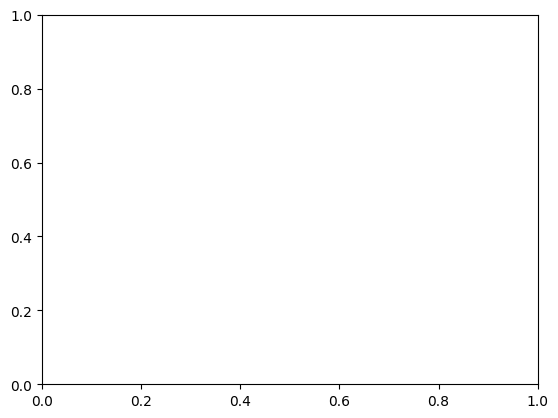

In [10]:
fig, ax = plt.subplots()
ax.plot(df['dt_string time'],df['thermal_zone7'], label='thermal_zone7')
#ax.plot(df['time'],df['thermal_zone1'], label='thermal_zone1')
#ax.plot(df['time'],df['thermal_zone2'], label='thermal_zone2')
#ax.plot(df['time'],df['thermal_zone3'], label='thermal_zone3')
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('date-time')
plt.ylabel('zonas_termicas')
plt.title('gráfico de zonas térmicas')
plt.legend()
plt.show()

import matplotlib.ticker as ticker
import csv

with open('temp_database.txt', 'r') as csvfile: 
    df = csv.reader(csvfile, delimiter=',')    
        
    plt.plot(x = "day", y = "thermal_zone7" , color = 'g', linestyle = 'dashed',marker = 'o',label = "thermal")
  
    plt.xticks(rotation = 25)
    plt.xlabel('Dates')
    plt.ylabel('Temperature(°C)')
    plt.title('Thermal_zone', fontsize = 20)
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
 def save_thermal_temperature(zona, file):
    q = open(file, 'w')
    zona_temp = ([int(value(os.path.join(p, 'temp'))) for p in zona])
    
    now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")   
    label = ""
    label = str("day")+";"+str("time")
    record = ""
    record = str(now).split(" ")[0]+";"+str(now).split(" ")[1]
    i=0
    for p in zona: 
        label += ";"+str(p.split("/")[-1])
        record +=";"+str(zona_temp[i])
        i+=1        
    record +=str('\n')
    q.write(str(label)+"\n")
    q.write(record)    
    q.close()
    
def print_several_temps_all_zones(file):
    df = pd.read_csv(file, sep=";", header=None)
    
    time_list = df[df.columns[1]].values.tolist()[1:]
    zones_dict = {}    
    all_zones_in_a_dictionary(zones_dict, df)
    print(zones_dict)
    zonesdict = zones_dict
    
    df = pd.DataFrame(data=zonesdict)
    df.index = time_list
    lines = df.plot.line(figsize=(15, 6))
    plt.title("Gráfico das Zonas Térmicas")
    plt.xlabel('Horário')
    plt.ylabel('Temperatura em MiliCelsius')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.85))
    
def all_zones_in_a_dictionary(zones_dict, df):

    for i in range(2, df.shape[1]):
        print("accessing position:", i)
        zone_name = df[df.columns[i]].values.tolist()[0]
        temp_list = df[df.columns[i]].values.tolist()[1:]
        temp_list_2 = [float(element) for element in temp_list]

        zones_dict[str(zone_name)] = temp_list_2
    return zones_dict